In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
import io
%cd "C:\Users\DELL\Desktop\NYC green taxi"

C:\Users\DELL\Desktop\NYC green taxi


In [119]:
greentaxi=pd.read_csv("NYC Green Taxi June 2022.csv",low_memory=False)

In [120]:
greentaxi.shape

(73718, 20)

In [121]:
greentaxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   VendorID(Int64)                73718 non-null  int64  
 1   lpep_pickup_datetime(Int64)    73718 non-null  float64
 2   lpep_dropoff_datetime(Int64)   73718 non-null  float64
 3   store_and_fwd_flag(String)     64436 non-null  object 
 4   RatecodeID(Double)             64436 non-null  float64
 5   PULocationID(Int64)            73718 non-null  int64  
 6   DOLocationID(Int64)            73718 non-null  int64  
 7   passenger_count(Double)        64436 non-null  float64
 8   trip_distance(Double)          73718 non-null  float64
 9   fare_amount(Double)            73718 non-null  float64
 10  extra(Double)                  73718 non-null  float64
 11  mta_tax(Double)                73718 non-null  float64
 12  tip_amount(Double)             73718 non-null 

# Exploratory Data Analysis- EDA

# What is Exploratory Data Analysis?
Exploratory Data Analysis is investigating data and drawing out insights from it to study its main characteristics. 
EDA can be done using statistical and visualization techniques.

# Why is EDA important?

We simply can’t make sense of such huge datasets if we don’t explore the data.

Exploring and analyzing the data is important to see how features are contributing to the target variable, identifying anomalies and outliers to treat them lest they affect our model, to study the nature of the features, and be able to perform data cleaning so that our model building process is as efficient as possible.

If we don’t perform exploratory data analysis, we won’t be able to find inconsistent or incomplete data that may pose trends incorrectly to our model.

From a business point of view, business stakeholders often have certain assumptions about data. Exploratory Data Analysis helps us look deeper and see if our intuition matches with the data. It helps us see if we are asking the right questions.

This step also serves as the basis for answering our business questions.



In [122]:
# head, tail, shape, dtypes, describe.

In [123]:
greentaxi.head()

,VendorID(Int64),lpep_pickup_datetime(Int64),lpep_dropoff_datetime(Int64),store_and_fwd_flag(String),RatecodeID(Double),PULocationID(Int64),DOLocationID(Int64),passenger_count(Double),trip_distance(Double),fare_amount(Double),extra(Double),mta_tax(Double),tip_amount(Double),tolls_amount(Double),ehail_fee(Int32),improvement_surcharge(Double),total_amount(Double),payment_type(Double),trip_type(Double),congestion_surcharge(Double)
0,2,1.654040e+15,1.654040e+15,N,1.0,134,216,2.0,2.03,7.5,0.5,0.5,2.64,0.0,NaN,0.3,11.44,1.0,1.0,0.0
1,2,1.654050e+15,1.654050e+15,N,1.0,134,216,2.0,4.26,14.5,0.5,0.5,3.16,0.0,NaN,0.3,18.96,1.0,1.0,0.0
2,2,1.654040e+15,1.654040e+15,N,5.0,53,53,1.0,0.00,15.0,0.0,0.0,4.59,0.0,NaN,0.3,19.89,1.0,2.0,0.0
3,2,1.654040e+15,1.654040e+15,N,1.0,65,17,1.0,1.78,9.5,0.5,0.5,1.00,0.0,NaN,0.3,11.80,1.0,1.0,0.0
4,2,1.654040e+15,1.654040e+15,N,1.0,41,159,3.0,3.10,13.0,0.5,0.5,0.00,0.0,NaN,0.3,14.30,2.0,1.0,0.0


In [124]:
greentaxi.tail()

,VendorID(Int64),lpep_pickup_datetime(Int64),lpep_dropoff_datetime(Int64),store_and_fwd_flag(String),RatecodeID(Double),PULocationID(Int64),DOLocationID(Int64),passenger_count(Double),trip_distance(Double),fare_amount(Double),extra(Double),mta_tax(Double),tip_amount(Double),tolls_amount(Double),ehail_fee(Int32),improvement_surcharge(Double),total_amount(Double),payment_type(Double),trip_type(Double),congestion_surcharge(Double)
73713,2,1.656630e+15,1.656630e+15,NaN,NaN,74,169,NaN,2.86,18.66,0.0,0.0,2.30,0.0,NaN,0.3,21.26,NaN,NaN,NaN
73714,2,1.656630e+15,1.656630e+15,NaN,NaN,25,14,NaN,6.84,24.16,0.0,0.0,5.91,0.0,NaN,0.3,30.37,NaN,NaN,NaN
73715,2,1.656630e+15,1.656630e+15,NaN,NaN,106,137,NaN,8.47,32.69,0.0,0.0,4.97,0.0,NaN,0.3,40.71,NaN,NaN,NaN
73716,2,1.656630e+15,1.656630e+15,NaN,NaN,181,36,NaN,4.67,23.55,0.0,0.0,5.76,0.0,NaN,0.3,29.61,NaN,NaN,NaN
73717,2,1.656630e+15,1.656630e+15,NaN,NaN,255,61,NaN,3.59,17.24,0.0,0.0,2.00,0.0,NaN,0.3,19.54,NaN,NaN,NaN


In [125]:
greentaxi.dtypes

VendorID(Int64)                    int64
lpep_pickup_datetime(Int64)      float64
lpep_dropoff_datetime(Int64)     float64
store_and_fwd_flag(String)        object
RatecodeID(Double)               float64
PULocationID(Int64)                int64
DOLocationID(Int64)                int64
passenger_count(Double)          float64
trip_distance(Double)            float64
fare_amount(Double)              float64
extra(Double)                    float64
mta_tax(Double)                  float64
tip_amount(Double)               float64
tolls_amount(Double)             float64
ehail_fee(Int32)                 float64
improvement_surcharge(Double)    float64
total_amount(Double)             float64
payment_type(Double)             float64
trip_type(Double)                float64
congestion_surcharge(Double)     float64
dtype: object

In [126]:
greentaxi.columns # variables for the references 

Index(['VendorID(Int64)', 'lpep_pickup_datetime(Int64)',
       'lpep_dropoff_datetime(Int64)', 'store_and_fwd_flag(String)',
       'RatecodeID(Double)', 'PULocationID(Int64)', 'DOLocationID(Int64)',
       'passenger_count(Double)', 'trip_distance(Double)',
       'fare_amount(Double)', 'extra(Double)', 'mta_tax(Double)',
       'tip_amount(Double)', 'tolls_amount(Double)', 'ehail_fee(Int32)',
       'improvement_surcharge(Double)', 'total_amount(Double)',
       'payment_type(Double)', 'trip_type(Double)',
       'congestion_surcharge(Double)'],
      dtype='object')

In [127]:
greentaxi.describe() # Description of the data(the summary statistics of the numerical attributes in the data.)

,VendorID(Int64),lpep_pickup_datetime(Int64),lpep_dropoff_datetime(Int64),RatecodeID(Double),PULocationID(Int64),DOLocationID(Int64),passenger_count(Double),trip_distance(Double),fare_amount(Double),extra(Double),mta_tax(Double),tip_amount(Double),tolls_amount(Double),ehail_fee(Int32),improvement_surcharge(Double),total_amount(Double),payment_type(Double),trip_type(Double),congestion_surcharge(Double)
count,73718.000000,7.371800e+04,7.371800e+04,64436.000000,73718.000000,73718.000000,64436.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,0.0,73718.000000,73718.000000,64436.000000,64435.000000,64436.000000
mean,1.856738,1.655327e+15,1.655328e+15,1.223291,101.139383,138.788179,1.283723,104.576467,15.671497,0.346503,0.412261,2.115920,0.277911,NaN,0.297037,19.793064,1.365743,1.046528,0.740933
std,0.350342,2.332966e+12,2.332833e+12,0.983430,64.883305,76.707941,0.909935,3609.883882,14.004140,0.650320,0.193454,3.250391,1.412800,NaN,0.036460,16.203584,0.498894,0.210626,1.220242
min,1.000000,1.230760e+15,1.230780e+15,1.000000,1.000000,1.000000,0.000000,0.000000,-85.000000,-4.500000,-0.500000,-0.960000,0.000000,NaN,-0.300000,-85.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.654710e+15,1.654710e+15,1.000000,65.000000,74.000000,1.000000,1.170000,8.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,10.300000,1.000000,1.000000,0.000000
50%,2.000000,1.655320e+15,1.655320e+15,1.000000,75.000000,138.000000,1.000000,2.100000,11.500000,0.000000,0.500000,1.500000,0.000000,NaN,0.300000,15.360000,1.000000,1.000000,0.000000
75%,2.000000,1.655990e+15,1.655990e+15,1.000000,134.000000,219.000000,1.000000,3.910000,19.000000,0.500000,0.500000,3.010000,0.000000,NaN,0.300000,23.727500,2.000000,1.000000,2.750000
max,2.000000,1.656650e+15,1.656700e+15,99.000000,265.000000,265.000000,8.000000,292061.660000,399.500000,4.500000,3.550000,222.250000,31.750000,NaN,0.300000,400.300000,5.000000,2.000000,2.750000


In [128]:
# checking for the duplicate values 
 
greentaxi.duplicated().sum()

127

In [129]:
greentaxi.drop_duplicates(inplace=True)

In [130]:
greentaxi.duplicated().sum() # we did not have any duplicate values

0

In [131]:
greentaxi.shape

(73591, 20)

In [132]:
# Remove the Data Types in Paranthesis from columns Names
greentaxi.columns=greentaxi.columns.str.replace(
    r"\(.*\)?","")

C:\Users\DELL\AppData\Local\Temp\ipykernel_6052\845650284.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  greentaxi.columns=greentaxi.columns.str.replace(


In [243]:
greentaxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73591 entries, 0 to 73717
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   store_and_fwd_flag     73591 non-null  object 
 1   RatecodeID             73591 non-null  float64
 2   passenger_count        73591 non-null  float64
 3   trip_distance          73591 non-null  float64
 4   fare_amount            73591 non-null  float64
 5   extra                  73591 non-null  float64
 6   mta_tax                73591 non-null  float64
 7   tip_amount             73591 non-null  float64
 8   tolls_amount           73591 non-null  float64
 9   improvement_surcharge  73591 non-null  float64
 10  total_amount           73591 non-null  float64
 11  payment_type           73591 non-null  float64
 12  trip_type              73591 non-null  float64
 13  congestion_surcharge   73591 non-null  float64
 14  weekday                73591 non-null  int64  
dtypes:

In [134]:
print(greentaxi.total_amount.describe())
print("Skew:",greentaxi.total_amount.skew())
print("Kurt:",greentaxi.total_amount.kurt())

# very high positive skewness is there because we have outliers

count    73591.000000
mean        19.818593
std         16.203990
min        -85.300000
25%         10.300000
50%         15.360000
75%         23.760000
max        400.300000
Name: total_amount, dtype: float64
Skew: 4.082205798136926
Kurt: 39.36328301640114


# Univariate Analysis

The univariate analysis involves studying patterns of all variables individually.

Target Variable
Let us start by analyzing the target variable.

<AxesSubplot:xlabel='total_amount', ylabel='Count'>

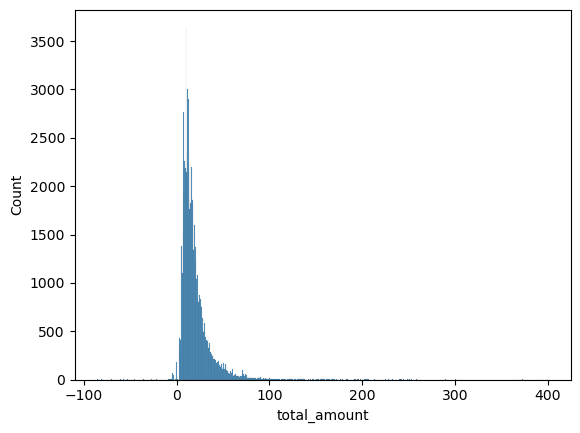

In [135]:
sns.histplot(greentaxi.total_amount)

# The histogram is really skewed as we can see.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_amount'>

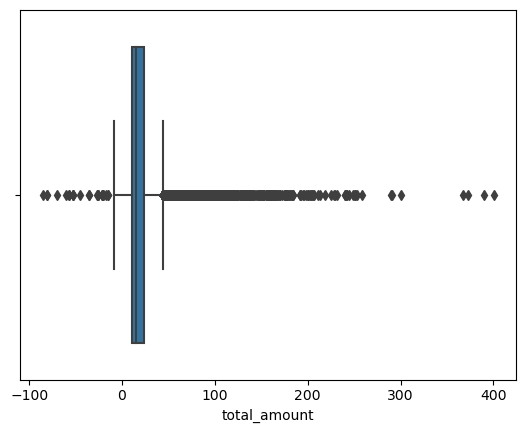

In [136]:
#greentaxi.total_amount.plot(kind='box',vert=False)
sns.boxplot(greentaxi.total_amount)

<AxesSubplot:xlabel='total_amount', ylabel='Density'>

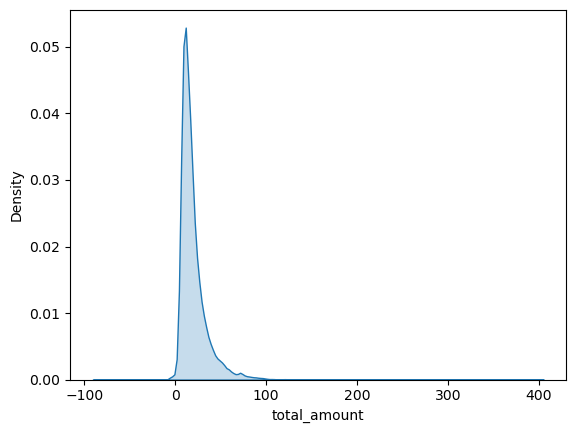

In [137]:
sns.kdeplot(greentaxi["total_amount"],shade=True)

In [244]:
# Passenger Count
greentaxi.passenger_count.value_counts()

1.0    64405
2.0     5459
5.0     1280
6.0     1027
3.0      931
4.0      276
0.0      201
8.0        6
7.0        6
Name: passenger_count, dtype: int64

**There are some trips with even 0 passenger count.



<AxesSubplot:xlabel='passenger_count', ylabel='count'>

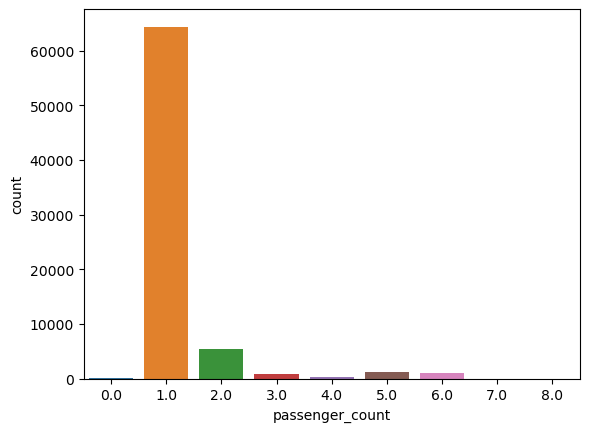

In [246]:
#sns.countplot(greentaxi["passenger_count"])
sns.countplot(x='passenger_count',data=greentaxi)

In [248]:
## trip_distance
greentaxi.trip_distance.value_counts()

0.00        4699
1.40         574
1.30         521
1.10         443
1.20         440
            ... 
13.02          1
14.39          1
54.90          1
15583.22       1
23.05          1
Name: trip_distance, Length: 2275, dtype: int64

We see there are 4699 trips with 0 km distance.

The reasons for 0 km distance can be:

The dropoff location couldn’t be tracked.
The driver deliberately took this ride to complete a target ride number.
The passengers canceled the trip.

<AxesSubplot:xlabel='trip_distance', ylabel='count'>

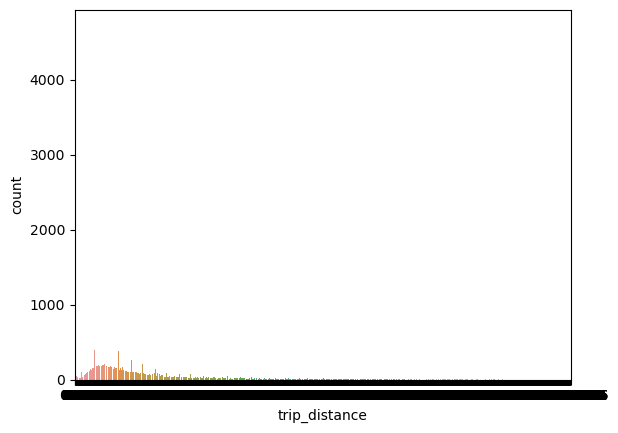

In [249]:
sns.countplot(x='trip_distance',data=greentaxi)

<AxesSubplot:xlabel='trip_distance', ylabel='Density'>

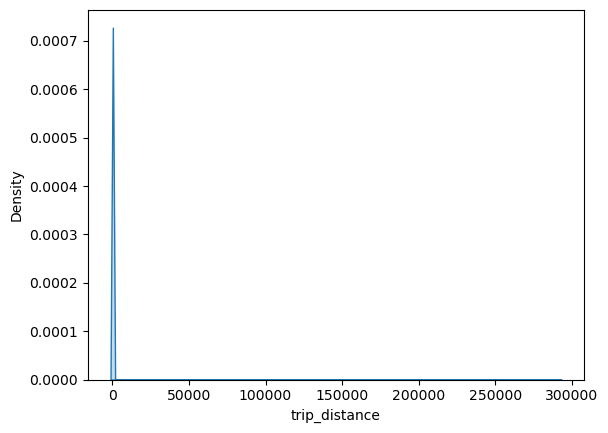

In [250]:
sns.kdeplot(greentaxi["trip_distance"],shade=True)

# Bivariate Analysis
Bivariate Analysis involves finding relationships, patterns, and correlations between two variables.

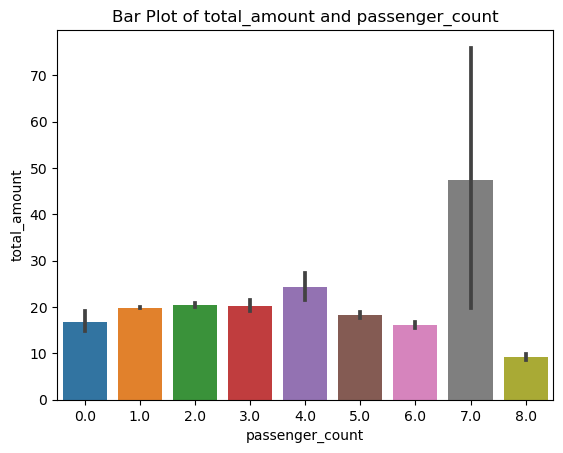

In [254]:
# Bar plot of total_amount and passenger_count
sns.barplot(x="passenger_count",y="total_amount", data=greentaxi)
plt.xlabel("passenger_count")
plt.ylabel("total_amount")
plt.title("Bar Plot of total_amount and passenger_count")
plt.show()

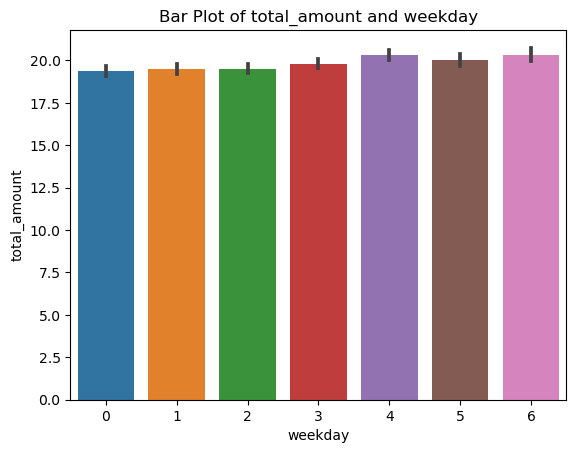

In [253]:
# Bar plot of total_amount and weekday
sns.barplot(x="weekday",y="total_amount", data=greentaxi)
plt.xlabel("weekday")
plt.ylabel("total_amount")
plt.title("Bar Plot of total_amount and weekday")
plt.show()

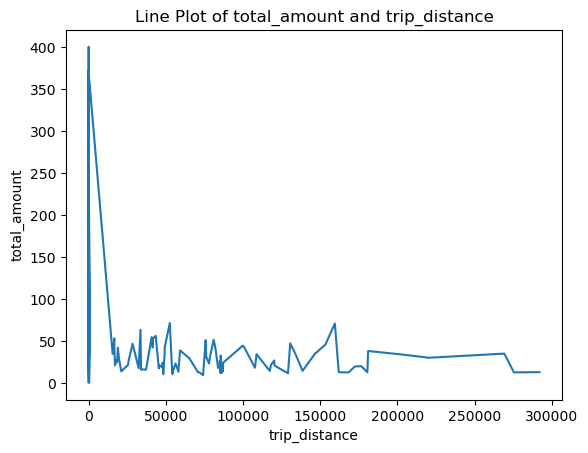

In [256]:
sns.lineplot(x="trip_distance",y="total_amount",data=greentaxi)
plt.xlabel("trip_distance")
plt.ylabel("total_amount")
plt.title("Line Plot of total_amount and trip_distance")
plt.show()

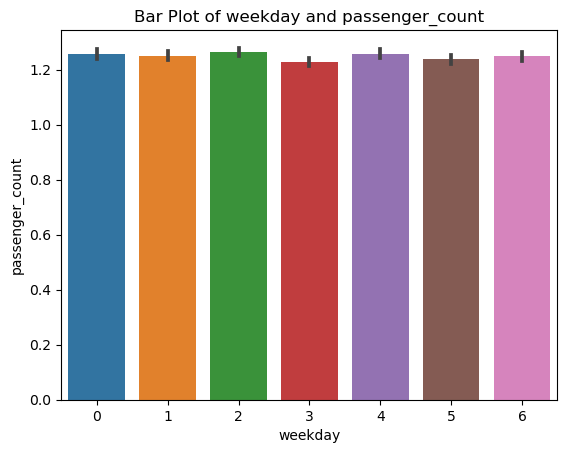

In [257]:
# Bar plot of weekday and passenger_count
sns.barplot(x="weekday",y="passenger_count", data=greentaxi)
plt.xlabel("weekday")
plt.ylabel("passenger_count")
plt.title("Bar Plot of weekday and passenger_count")
plt.show()

In [138]:
# Drop unnessary Colunm
greentaxi=greentaxi.drop(('ehail_fee'),axis=1)

In [139]:
# Checking for the Missing values 
greentaxi.isnull().sum().sort_values(ascending=False) # isnull is a function for missing values


trip_type                9283
congestion_surcharge     9282
store_and_fwd_flag       9282
RatecodeID               9282
payment_type             9282
passenger_count          9282
mta_tax                     0
total_amount                0
improvement_surcharge       0
tolls_amount                0
tip_amount                  0
VendorID                    0
extra                       0
lpep_pickup_datetime        0
trip_distance               0
DOLocationID                0
PULocationID                0
lpep_dropoff_datetime       0
fare_amount                 0
dtype: int64

In [140]:
greentaxi.trip_type.value_counts(dropna=False) # trip_type is a categorical data

1.0    61312
NaN     9283
2.0     2996
Name: trip_type, dtype: int64

In [141]:
greentaxi.trip_type=greentaxi.trip_type.fillna(1.0)

In [142]:
greentaxi.congestion_surcharge.describe() # congestion_surcharge is a numeric 

count    64309.000000
mean         0.742268
std          1.220935
min         -2.750000
25%          0.000000
50%          0.000000
75%          2.750000
max          2.750000
Name: congestion_surcharge, dtype: float64

In [143]:
greentaxi.congestion_surcharge=greentaxi.congestion_surcharge.fillna(0)

In [144]:
greentaxi.store_and_fwd_flag.value_counts(dropna=False) # store_and_fwd_flag is a categorical 

N      63511
NaN     9282
Y        798
Name: store_and_fwd_flag, dtype: int64

In [145]:
greentaxi.store_and_fwd_flag=greentaxi.store_and_fwd_flag.fillna("N")

In [146]:
greentaxi.payment_type.value_counts(dropna=False)

1.0    41271
2.0    22650
NaN     9282
3.0      317
4.0       69
5.0        2
Name: payment_type, dtype: int64

In [147]:
greentaxi.payment_type=greentaxi.payment_type.fillna(1.0)

In [148]:
greentaxi.passenger_count.describe()

count    64309.000000
mean         1.284268
std          0.910708
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: passenger_count, dtype: float64

In [149]:
greentaxi.passenger_count=greentaxi.passenger_count.fillna(1.0)

In [150]:
greentaxi.RatecodeID.value_counts(False)

1.0     60486
5.0      3427
2.0       281
4.0        65
3.0        49
99.0        1
Name: RatecodeID, dtype: int64

In [151]:
greentaxi.RatecodeID=greentaxi.RatecodeID.fillna(1.0)

In [152]:
# Missing Values is done now 

In [153]:
greentaxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,1.654040e+15,1.654040e+15,N,1.0,134,216,2.0,2.03,7.5,0.5,0.5,2.64,0.0,0.3,11.44,1.0,1.0,0.0
1,2,1.654050e+15,1.654050e+15,N,1.0,134,216,2.0,4.26,14.5,0.5,0.5,3.16,0.0,0.3,18.96,1.0,1.0,0.0
2,2,1.654040e+15,1.654040e+15,N,5.0,53,53,1.0,0.00,15.0,0.0,0.0,4.59,0.0,0.3,19.89,1.0,2.0,0.0
3,2,1.654040e+15,1.654040e+15,N,1.0,65,17,1.0,1.78,9.5,0.5,0.5,1.00,0.0,0.3,11.80,1.0,1.0,0.0
4,2,1.654040e+15,1.654040e+15,N,1.0,41,159,3.0,3.10,13.0,0.5,0.5,0.00,0.0,0.3,14.30,2.0,1.0,0.0


In [154]:
# Pickup and droff is into nano second , so we need to convert them into date time 

In [155]:
greentaxi.lpep_pickup_datetime=greentaxi.lpep_pickup_datetime.astype('int64')/10**6
# we have converted the lpep_pickup_datetime into data and time

In [156]:
greentaxi['pickup']=pd.to_datetime(greentaxi.lpep_pickup_datetime,unit='s')

In [157]:
greentaxi.lpep_dropoff_datetime=greentaxi.lpep_dropoff_datetime.astype('int64')/10**6

In [158]:
greentaxi['dropoff']=pd.to_datetime(greentaxi.lpep_dropoff_datetime,unit='s')

In [159]:
greentaxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73591 entries, 0 to 73717
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               73591 non-null  int64         
 1   lpep_pickup_datetime   73591 non-null  float64       
 2   lpep_dropoff_datetime  73591 non-null  float64       
 3   store_and_fwd_flag     73591 non-null  object        
 4   RatecodeID             73591 non-null  float64       
 5   PULocationID           73591 non-null  int64         
 6   DOLocationID           73591 non-null  int64         
 7   passenger_count        73591 non-null  float64       
 8   trip_distance          73591 non-null  float64       
 9   fare_amount            73591 non-null  float64       
 10  extra                  73591 non-null  float64       
 11  mta_tax                73591 non-null  float64       
 12  tip_amount             73591 non-null  float64       
 13  t

In [160]:
# Drop unnessary columns 

In [161]:
greentaxi.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'pickup',
       'dropoff'],
      dtype='object')

In [162]:
greentaxi=greentaxi.drop(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime','PULocationID', 'DOLocationID'],axis=1)

In [163]:
# we can drop pickup and dropoff also as it is only the one day data and we are not getting any info 

In [164]:
greentaxi['weekday']=greentaxi.dropoff.dt.weekday

In [165]:
greentaxi.weekday.value_counts()
# on wednesday there are lots of trips

3    13225
2    12959
4    11005
1    10059
0     9281
5     8957
6     8105
Name: weekday, dtype: int64

In [166]:
greentaxi=greentaxi.drop(['pickup', 'dropoff'],axis=1)

# Hypothesis Testing

In [167]:
greentaxi.total_amount.groupby(greentaxi.trip_type).mean()

trip_type
1.0    19.165568
2.0    35.205868
Name: total_amount, dtype: float64

In [168]:
# For 2 Sample Independent T test - Variance difference is also checked
np.round(greentaxi.total_amount.groupby(greentaxi.trip_type).var(),2)

trip_type
1.0     220.10
2.0    1016.68
Name: total_amount, dtype: float64

In [169]:
# Test Null Average total_amount of different trip equal
type1=greentaxi[greentaxi.trip_type==1.0]
type2=greentaxi[greentaxi.trip_type==2.0]

In [170]:
from scipy.stats import ttest_ind

In [171]:
ttest_ind(type1.total_amount,type2.total_amount,equal_var=False)
# since p-value is 4.692687086703642e-148 which is less than 0.05
# Reject Null
# Null - There is no significant difference in Average total_amount of different trip_type

Ttest_indResult(statistic=-27.409767437769037, pvalue=4.692687086703642e-148)

In [172]:
# Test Null Average total_amount of different weekday equal
greentaxi.total_amount.groupby(greentaxi.weekday).mean()

weekday
0    19.387942
1    19.486843
2    19.510549
3    19.802879
4    20.331547
5    20.000608
6    20.343986
Name: total_amount, dtype: float64

# Anova Single Factor or Oneway Anova
One Variable Numerical and Other variable Categorical with more than
2 Levels/Groups/Classes - Anova Single Factor or Oneway Anova

In [173]:
wd0=greentaxi[greentaxi.weekday==0]
wd1=greentaxi[greentaxi.weekday==1]
wd2=greentaxi[greentaxi.weekday==2]
wd3=greentaxi[greentaxi.weekday==3]
wd4=greentaxi[greentaxi.weekday==4]
wd5=greentaxi[greentaxi.weekday==5]
wd6=greentaxi[greentaxi.weekday==6]

In [174]:
print(wd0.shape)
print(wd1.shape)
print(wd2.shape)
print(wd3.shape)
print(wd4.shape)
print(wd5.shape)
print(wd6.shape)

(9281, 15)
(10059, 15)
(12959, 15)
(13225, 15)
(11005, 15)
(8957, 15)
(8105, 15)


In [175]:
from scipy.stats import f_oneway

In [176]:
f_oneway(wd0.total_amount,wd1.total_amount,wd2.total_amount,wd3.total_amount,wd4.total_amount,wd5.total_amount,
        wd6.total_amount)

# Since pvalue=2.5735570508478754e-06 is less than 0.05 
# Reject Null. Difference in mean is statistically significant

F_onewayResult(statistic=6.026903365441741, pvalue=2.5735570508478754e-06)

# Chi Square Test of Independence
Both Variables are Non Numeric and Categorical
**Input of this test is Cross Tabulation
**Null - There is No Association between both variables
**Alt - There is Association between both variables


In [177]:
pd.crosstab(greentaxi.weekday,greentaxi.payment_type)

payment_type,1.0,2.0,3.0,4.0,5.0
weekday,,,,,
0,6361,2863,48,9,0
1,6942,3072,32,13,0
2,8874,4014,58,13,0
3,9065,4097,53,9,1
4,7530,3420,48,7,0
5,6104,2814,33,6,0
6,5677,2370,45,12,1


In [178]:
from scipy.stats import chi2_contingency

In [179]:
chi2_contingency(pd.crosstab(greentaxi.weekday,greentaxi.payment_type))

# Since P-Value is 0.1303128863259544 is greater than 0.05 
# Fail to reject Null
# Thereis no relationship between payment_type and weekday

(31.867488380718015,
 0.1303128863259544,
 24,
 array([[6.37554039e+03, 2.85652661e+03, 3.99787610e+01, 8.70200160e+00,
         2.52231931e-01],
        [6.90998392e+03, 3.09598117e+03, 4.33300675e+01, 9.43146580e+00,
         2.73375820e-01],
        [8.90212563e+03, 3.98854955e+03, 5.58220842e+01, 1.21505483e+01,
         3.52189806e-01],
        [9.08485311e+03, 4.07041962e+03, 5.69679037e+01, 1.23999538e+01,
         3.59418951e-01],
        [7.55983429e+03, 3.38714313e+03, 4.74050495e+01, 1.03184493e+01,
         2.99085486e-01],
        [6.15297008e+03, 2.75680518e+03, 3.85831012e+01, 8.39821446e+00,
         2.43426506e-01],
        [5.56769258e+03, 2.49457474e+03, 3.49130328e+01, 7.59936677e+00,
         2.20271501e-01]]))

In [180]:
# we found that there is some variation in data after the Hypothesis testing .

In [181]:
#  split data in to object and Numeric for Dummy Encoding

In [182]:
greentaxi.columns

Index(['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type',
       'congestion_surcharge', 'weekday'],
      dtype='object')

In [183]:
objectcols=greentaxi[['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type','weekday']]

In [184]:
numericcols=greentaxi.drop(['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type','weekday'],axis=1)

In [185]:
print(greentaxi.shape)
print(objectcols.shape)
print(numericcols.shape)

(73591, 15)
(73591, 5)
(73591, 10)


In [186]:
objectcolsdummy=pd.get_dummies(objectcols,columns=['store_and_fwd_flag', 'RatecodeID', 'payment_type', 
                                                   'trip_type','weekday'])

In [187]:
print(objectcolsdummy.shape)

(73591, 22)


In [188]:
numericcols.corr()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
passenger_count,1.000000,-0.008155,-0.021463,0.022389,0.079571,-0.007126,-0.012875,-0.011488,-0.018251,0.042650
trip_distance,-0.008155,1.000000,0.012229,-0.014979,-0.060145,0.011206,0.007755,0.002240,0.012223,-0.015514
fare_amount,-0.021463,0.012229,1.000000,-0.062749,-0.273943,0.367411,0.376371,0.055764,0.971556,0.028784
extra,0.022389,-0.014979,-0.062749,1.000000,0.247355,0.014962,-0.045228,0.059506,-0.017635,0.295986
mta_tax,0.079571,-0.060145,-0.273943,0.247355,1.000000,-0.230601,-0.112875,0.258811,-0.270037,0.229343
tip_amount,-0.007126,0.011206,0.367411,0.014962,-0.230601,1.000000,0.259930,0.026996,0.552177,0.125387
tolls_amount,-0.012875,0.007755,0.376371,-0.045228,-0.112875,0.259930,1.000000,-0.002536,0.459671,-0.059491
improvement_surcharge,-0.011488,0.002240,0.055764,0.059506,0.258811,0.026996,-0.002536,1.000000,0.064430,0.045070
total_amount,-0.018251,0.012223,0.971556,-0.017635,-0.270037,0.552177,0.459671,0.064430,1.000000,0.117882
congestion_surcharge,0.042650,-0.015514,0.028784,0.295986,0.229343,0.125387,-0.059491,0.045070,0.117882,1.000000


In [189]:
import seaborn as sns

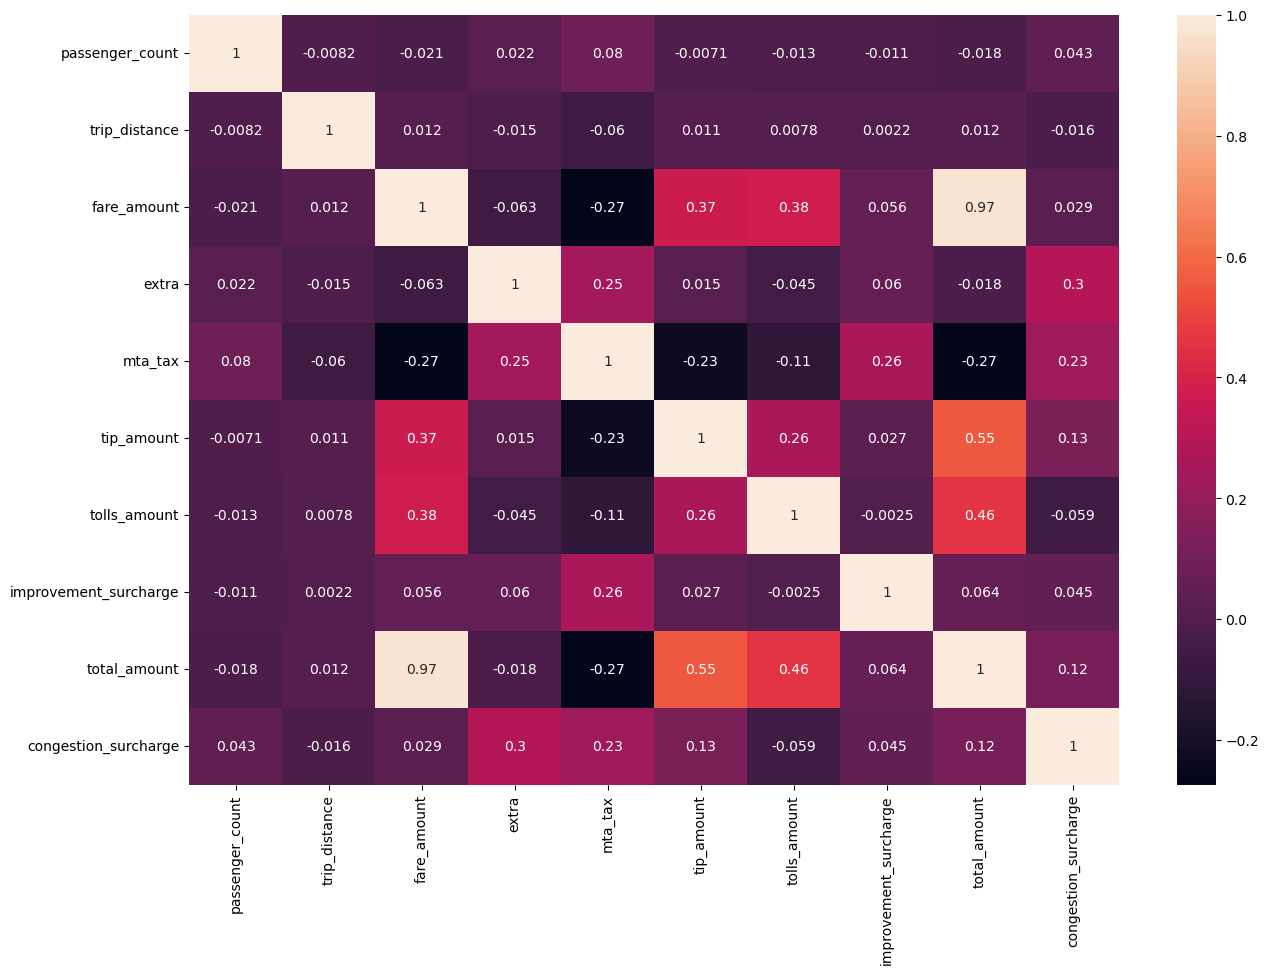

In [190]:
plt.figure(figsize=(15,10))
sns.heatmap(numericcols.corr(),annot=True)
plt.show()

In [191]:
numericcols=numericcols.drop('fare_amount',axis=1)

In [192]:
greentaxi_clean=pd.concat([numericcols,objectcolsdummy],axis=1)

In [193]:
y=greentaxi_clean.total_amount
X=greentaxi_clean.drop('total_amount',axis=1)

Skew: 4.082205798136926
Kurt: 39.36328301640114


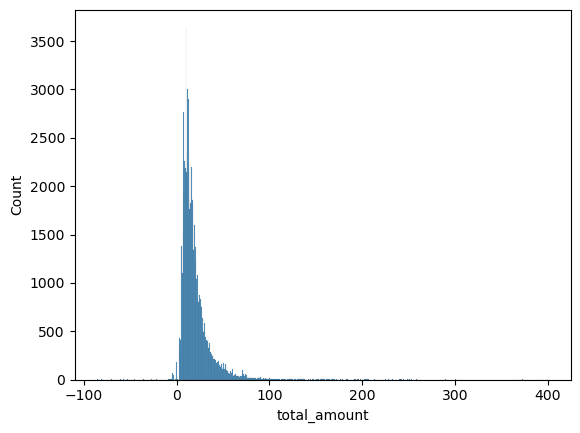

In [194]:
sns.histplot(y)
print("Skew:",y.skew())
print("Kurt:",y.kurt())

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_amount'>

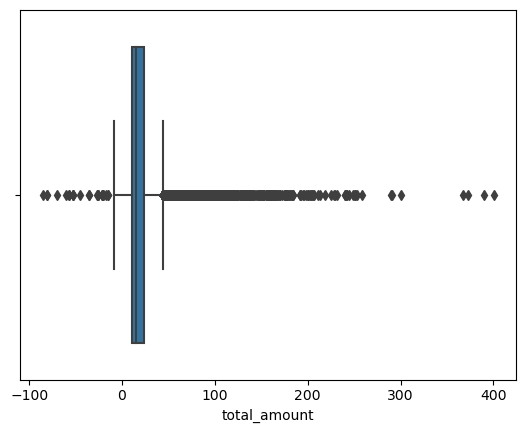

In [195]:
sns.boxplot(y)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_amount'>

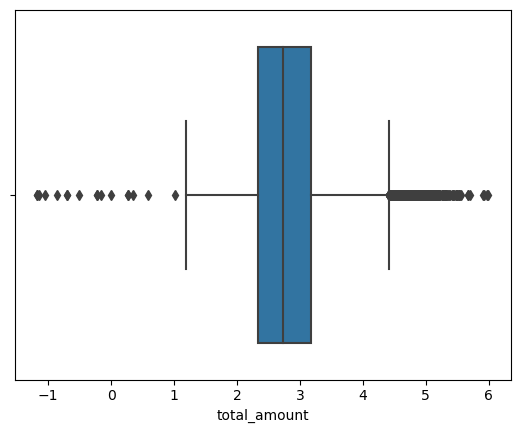

In [196]:
sns.boxplot(np.log(y))

In [197]:
# when we applied the logrithmic transformation , box is moved to the middle some what close to the normal distribution.

# Model Building

In [198]:
from sklearn.linear_model import LinearRegression

In [199]:
reg=LinearRegression()

In [200]:
regmodel=reg.fit(X,y)

In [201]:
regmodel.score(X,y) 

# R Square between 0.60-0.95 
# in our case we got R Square =0.488 which does not meet the basic requirement .

0.4881073471795282

In [202]:
cross_val_score(reg,X,y)

array([0.39241803, 0.41206218, 0.44459577, 0.41940574, 0.58791091])

In [234]:
np.mean([0.39241803, 0.41206218, 0.44459577, 0.41940574, 0.58791091])

0.45127852599999996

In [235]:
regpredict=regmodel.predict(X)

In [237]:
reg_residuals=y-regpredict # Residual

In [238]:
np.sqrt(np.mean(reg_residuals**2))

11.59333692944758

In [203]:
# Linear Regressing model is not working on this because of outliers base model will not work 

In [204]:
from sklearn.tree import DecisionTreeRegressor

In [205]:
tree=DecisionTreeRegressor(max_depth=10)

In [206]:
treemodel=tree.fit(X,y)

In [207]:
treemodel.score(X,y)

0.8642046754481009

In [208]:
# Trees models do not bother about the outliers and skewness, because they are non parametric algorithms( no assumptions)

In [209]:
from sklearn.model_selection import cross_val_score
# check for overfitting

In [210]:
cross_val_score(tree,X,y)

array([ 0.73349149,  0.69914013,  0.73614895,  0.72873641, -1.43241675])

In [211]:
np.mean([0.75298646,  0.72809776,  0.74720159,  0.73435634, -1.39685561]) 
# cross_val_score=0.313157308

0.313157308

In [212]:
treepredict=treemodel.predict(X)

In [213]:
tree_residuals=y-treepredict # Residual

In [214]:
np.sqrt(np.mean(tree_residuals**2)) 
# RMSE= 5.97
#Root mean Square Error (RMSE)- No Fixed Range and it is a comparitive 
# Metric and model that has the Least RMSE is best fit Model.


5.971197257546494

In [215]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
RF=RandomForestRegressor(n_estimators=3000,max_depth=10)

In [217]:
RFmodel=RF.fit(X,y)

In [218]:
RFmodel.score(X,y)

0.8782967228801323

In [219]:
cross_val_score(tree,X,y)

array([ 0.74699048,  0.72166696,  0.74790272,  0.72753604, -1.39693872])

In [220]:
np.mean([ 0.75381086,  0.72863213,  0.74514916,  0.70976346, -1.39439754])

0.308591614

In [221]:
RFpredict=RFmodel.predict(X)

In [222]:
RF_residuals=y-RFpredict # Residual

In [223]:
np.sqrt(np.mean(RF_residuals**2)) 

5.652884941122201

In [224]:
from sklearn.ensemble import GradientBoostingRegressor

In [225]:
gbm=GradientBoostingRegressor(n_estimators=5000)

In [226]:
gbmmodel=gbm.fit(X,y)

In [227]:
gbmmodel.score(X,y)

0.9089111425431655

In [228]:
cross_val_score(gbm,X,y)

array([0.77007054, 0.77679026, 0.79267164, 0.79203839, 0.66479434])

In [230]:
np.mean([0.77007054, 0.77679026, 0.79267164, 0.79203839, 0.66479434])

0.7592730340000001

In [231]:
gbmpredict=gbmmodel.predict(X)

In [232]:
gbm_residuals=y-gbmpredict # Residual

In [233]:
np.sqrt(np.mean(gbm_residuals**2)) 

4.890481686241418

# Model Performance Metrics:


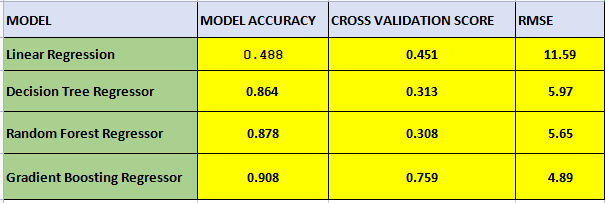

# Conclusion:

 Gradient Boosting Model (n_estimators = 5000) has the highest accuracy compared to all other models.